In [88]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import h5py

In [89]:
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [90]:
X_train,y_train,X_test,y_test,classes = load_dataset()

In [91]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [92]:
X_train = X_train/255.
X_test = X_test/255.
#y_train = convert_to_one_hot(y_train,6).T
#y_test = convert_to_one_hot(y_test,6).T
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.T
y_test = y_test.T
y_train = y_train.flatten()
y_test = y_test.flatten()
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 12288)
Y_train shape: (1080,)
X_test shape: (120, 12288)
Y_test shape: (120,)


In [93]:
X_train[0:5]

array([[0.89, 0.86, 0.84, ..., 0.82, 0.82, 0.82],
       [0.93, 0.91, 0.87, ..., 0.84, 0.8 , 0.75],
       [0.89, 0.86, 0.82, ..., 0.83, 0.81, 0.79],
       [0.89, 0.86, 0.82, ..., 0.79, 0.77, 0.76],
       [0.88, 0.85, 0.8 , ..., 0.78, 0.76, 0.75]])

In [94]:
y_train[0:5]

array([5, 0, 2, 5, 2], dtype=int64)

In [95]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)

X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.001, solver='liblinear')

In [109]:
yhat = LR.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(LR.predict(X_train),y_train)

0.9805555555555555

In [111]:
accuracy_score(yhat,y_test)

0.8583333333333333

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=classes))

[[20  0  0  0  0  0]
 [ 0 19  0  1  0  0]
 [ 1  4 14  1  0  0]
 [ 1  0  0 19  0  0]
 [ 0  1  1  2 14  2]
 [ 0  0  1  1  1 17]]


Confusion matrix, without normalization
[[20  0  0  0  0  0]
 [ 0 19  0  1  0  0]
 [ 1  4 14  1  0  0]
 [ 1  0  0 19  0  0]
 [ 0  1  1  2 14  2]
 [ 0  0  1  1  1 17]]


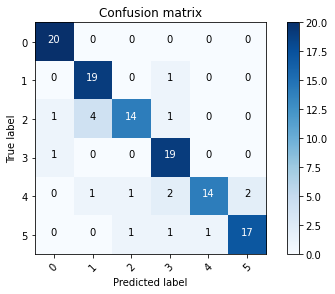

In [113]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=classes)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,normalize= False,  title='Confusion matrix')

In [114]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.79      0.95      0.86        20
           2       0.88      0.70      0.78        20
           3       0.79      0.95      0.86        20
           4       0.93      0.70      0.80        20
           5       0.89      0.85      0.87        20

    accuracy                           0.86       120
   macro avg       0.87      0.86      0.85       120
weighted avg       0.87      0.86      0.85       120



In [115]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.35, 0.24, 0.14, 0.07, 0.07, 0.13],
       [0.43, 0.1 , 0.19, 0.12, 0.1 , 0.05],
       [0.39, 0.04, 0.18, 0.14, 0.19, 0.06],
       [0.31, 0.18, 0.02, 0.03, 0.08, 0.39],
       [0.13, 0.36, 0.31, 0.06, 0.06, 0.08]])

In [116]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

1.0589270732592573

[1]


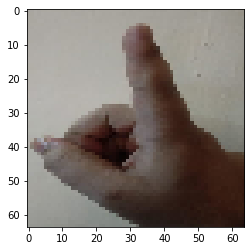

In [117]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow
img_path = 'my_image_finger.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)
x = image.img_to_array(img)
x=x.reshape(1,64*64*3)
print(LR.predict(x))